In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
len(x_train)

60000

In [49]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

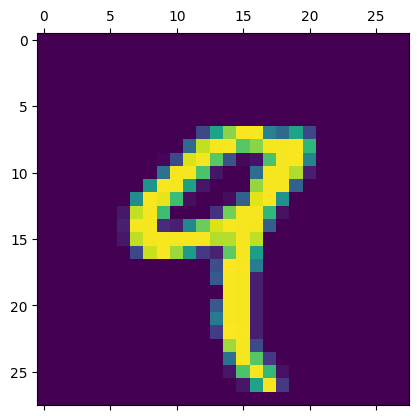

In [50]:
plt.matshow(x_train[4])

In [51]:
y_train[4]

np.uint8(9)

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
x_train=x_train/255
x_test=x_test/255

In [54]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [55]:
x_train_flattened.shape,x_test_flattened.shape

((60000, 784), (10000, 784))

In [56]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train_flattened,y_train,epochs=5)

d:\artificial intelligence\deep_learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4758
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3041
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2662


In [57]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2682


0.26822543144226074

In [58]:
test_pred=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


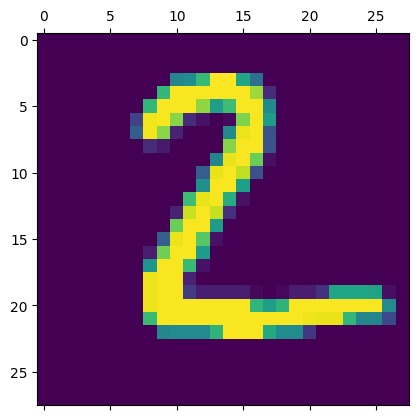

In [59]:
plt.matshow(x_test[1])

In [60]:
np.argmax(test_pred[1])

np.int64(2)

In [61]:
test_pred_labels=[np.argmax(i) for i in test_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=test_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,   11,  910,   20,   11,    3,   12,    9,   44,    4],
       [   4,    0,   15,  925,    0,   20,    2,   10,   24,   10],
       [   2,    1,    2,    1,  924,    0,   11,    4,   10,   27],
       [  11,    3,    2,   32,   12,  763,   18,    6,   38,    7],
       [  12,    3,    5,    1,    7,   10,  914,    2,    4,    0],
       [   1,    6,   22,    7,    9,    0,    0,  942,    5,   36],
       [   5,    9,    6,   22,    9,   19,   10,   10,  876,    8],
       [  11,    7,    1,   10,   32,    3,    0,   20,    7,  918]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True values')

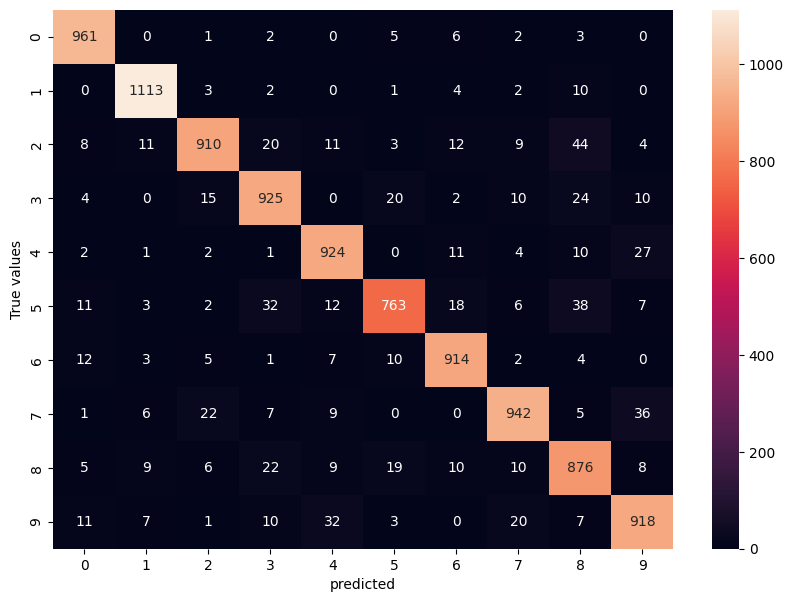

In [62]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('True values')

In [63]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train_flattened,y_train,epochs=5)

d:\artificial intelligence\deep_learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0666
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0518


In [64]:
test_pred=model.predict(x_test_flattened)
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0797


0.0797337219119072

In [65]:
test_pred_labels=[np.argmax(i) for i in test_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=test_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    0,    1,    4,    1,    1,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   4,    2, 1000,    6,    2,    0,    2,    5,   10,    1],
       [   1,    0,    3,  983,    0,    3,    0,    3,    7,   10],
       [   1,    0,    0,    0,  961,    0,    7,    1,    2,   10],
       [   2,    0,    0,   13,    1,  857,    5,    0,    7,    7],
       [   8,    2,    2,    1,    2,    3,  940,    0,    0,    0],
       [   1,    8,   10,    1,    0,    1,    0,  998,    3,    6],
       [   5,    0,    3,    4,    6,    3,    3,    3,  943,    4],
       [   2,    3,    0,    5,    9,    2,    1,    6,    0,  981]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True values')

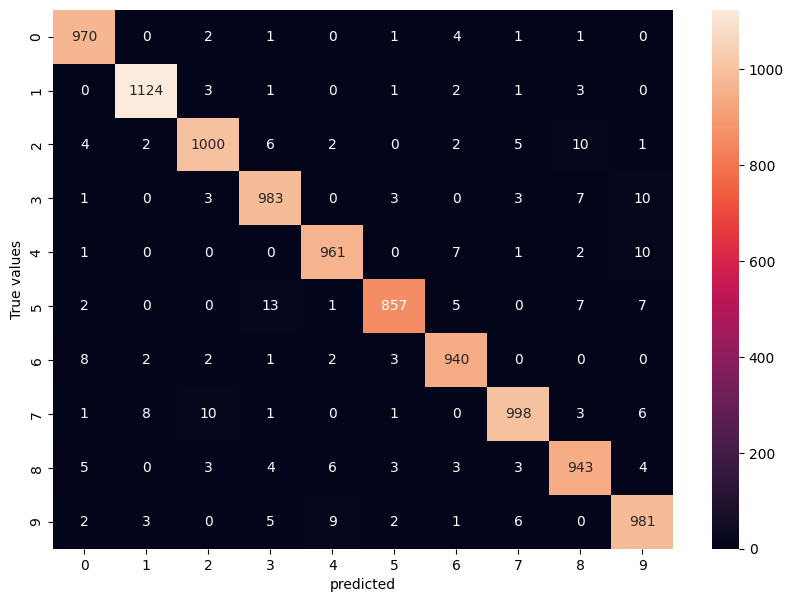

In [66]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('True values')

In [67]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=10)

d:\artificial intelligence\deep_learning\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2749
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1255
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0649
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0508
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0285
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0228
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0197


In [68]:
test_pred=model.predict(x_test)
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0853


0.08530887216329575

In [69]:
test_pred_labels=[np.argmax(i) for i in test_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=test_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    3,    1,    1,    0,    0,    2,    4],
       [   0, 1126,    2,    0,    0,    1,    2,    0,    3,    1],
       [   3,    4, 1000,    6,    3,    0,    2,    8,    5,    1],
       [   0,    0,    2,  991,    0,   10,    0,    4,    2,    1],
       [   0,    0,    5,    1,  947,    1,    3,    0,    4,   21],
       [   2,    0,    0,    8,    2,  874,    1,    0,    4,    1],
       [   2,    2,    1,    1,   10,    2,  937,    0,    3,    0],
       [   1,    6,    7,    3,    2,    0,    1,  998,    3,    7],
       [   5,    1,    0,    9,    3,    4,    3,    2,  944,    3],
       [   1,    3,    0,    3,    4,    5,    1,    5,    7,  980]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True values')

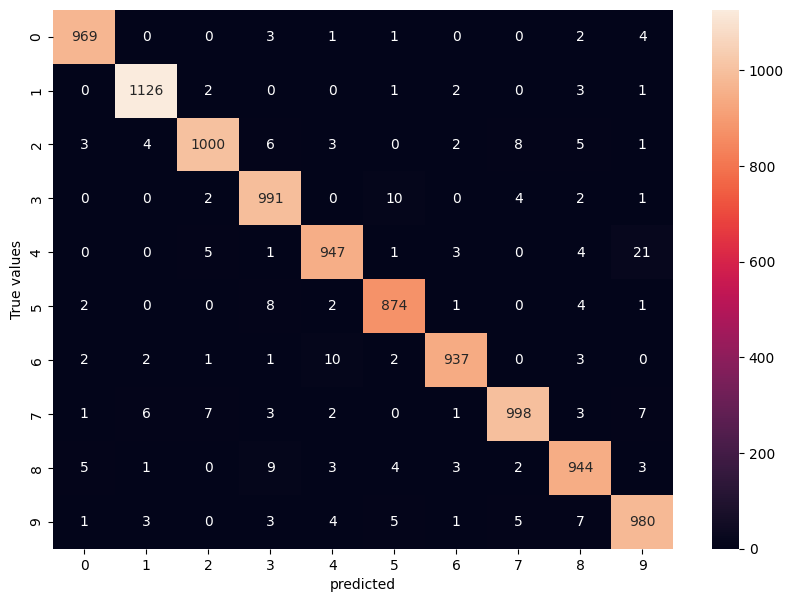

In [71]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('True values')